In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("TSLA.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [4]:
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
438,2012-03-26,7.118,7.618,7.008,7.48,7.48,15702500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [8]:
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [9]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [10]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [12]:
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 19.196970816607713
Root Mean Squared Error (RMSE): 4.381434789724447
R^2 Score: 0.9933314058858228

Decision Tree Regression Model Evaluation:
Mean Squared Error (MSE): 43.069327487124795
Root Mean Squared Error (RMSE): 6.562722566673438
R^2 Score: 0.9850386883156723

Random Forest Regression Model Evaluation:
Mean Squared Error (MSE): 40.36585783053997
Root Mean Squared Error (RMSE): 6.353413085148798
R^2 Score: 0.9859778126187713

Support Vector Regression (SVR) Model Evaluation:
Mean Squared Error (MSE): 1441.5864406976089
Root Mean Squared Error (RMSE): 37.96822935952648
R^2 Score: 0.49922542752437726

Gradient Boosting Regression Model Evaluation:
Mean Squared Error (MSE): 45.614714213931634
Root Mean Squared Error (RMSE): 6.753866612092041
R^2 Score: 0.9841544784522076


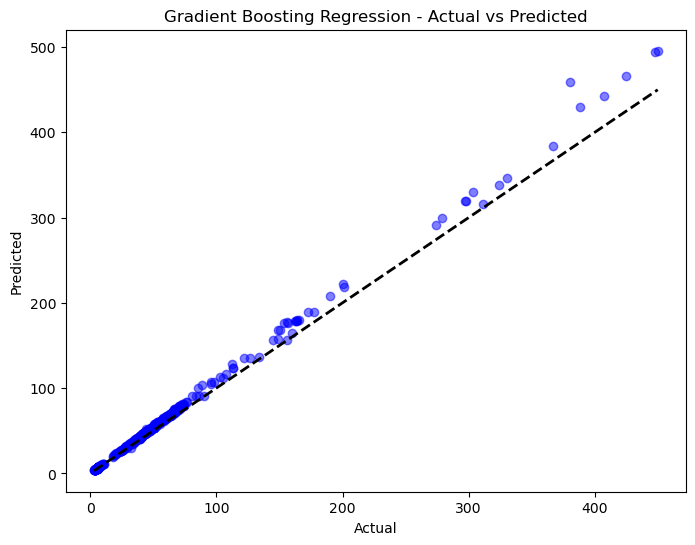

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'{name} - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

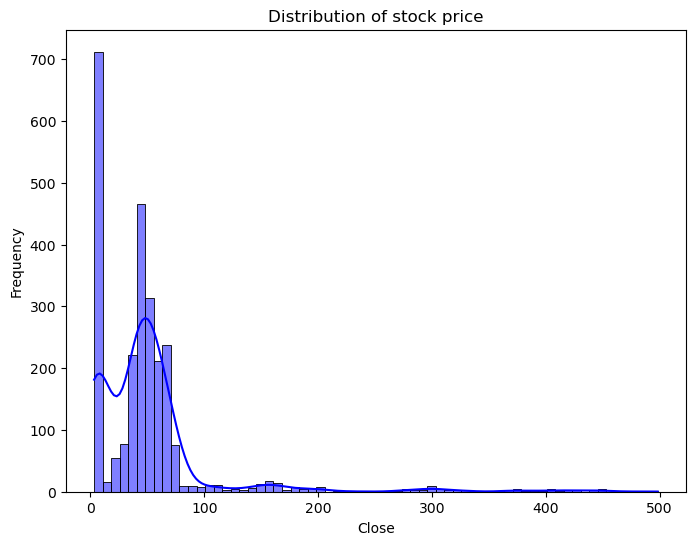

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Close'], kde=True, color='blue')
plt.title('Distribution of stock price')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

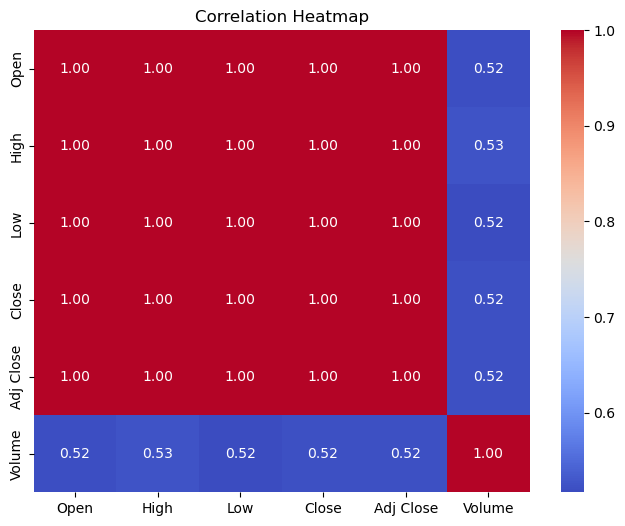

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
data=pd.read_csv('TSLA.csv')

In [19]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [20]:
X = data[['High','Low','Open','Volume']]
y = data['Close']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['High', 'Low', 'Open', 'Volume'])
    ]
)

In [23]:
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    "Decision Tree Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Support Vector Regression (SVR)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', SVR())
    ]),
    "Gradient Boosting Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
}


In [24]:
param_grids = {
    "Linear Regression": {},
    "Decision Tree Regression": {
        'model__max_depth': [3, 5, 7, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Regression": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    "Support Vector Regression (SVR)": {
        'model__C': [1, 10, 100],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['linear', 'rbf']
    },
    "Gradient Boosting Regression": {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    }
}

In [25]:
for name, pipeline in models.items():
    print(f"\nHyperparameter Tuning for {name}:")
    param_grid = param_grids.get(name, {})
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        best_model = pipeline
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")


Hyperparameter Tuning for Linear Regression:
Mean Squared Error (MSE): 0.9033937308417276
Root Mean Squared Error (RMSE): 0.9504702682576281
R^2 Score: 0.9996861814202966

Hyperparameter Tuning for Decision Tree Regression:
Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}
Mean Squared Error (MSE): 3.290174486336317
Root Mean Squared Error (RMSE): 1.8138838127995731
R^2 Score: 0.9988570676892827

Hyperparameter Tuning for Random Forest Regression:
Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Mean Squared Error (MSE): 3.694485032413067
Root Mean Squared Error (RMSE): 1.922104324019138
R^2 Score: 0.9987166193365907

Hyperparameter Tuning for Support Vector Regression (SVR):
Best Hyperparameters: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Mean Squared Error (MSE): 2.3702715756057344
Root Mean Squared Error (RMSE): 

In [26]:
pickle.dump(model, open('model.pkl', 'wb'))